In [2]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.optim as optim

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Преобразование изображений в тензоры
    transforms.Normalize((0.5,), (0.5,))  # Нормализация изображений
])

data_train = datasets.MNIST(root="./data/", transform=transform, train=True, download=True)
data_test = datasets.MNIST(root="./data/", transform=transform, train = False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 6042742.39it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 160367.52it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1509683.08it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 13030457.43it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
from torch.utils.data import DataLoader

train_data_loader = DataLoader(data_train, batch_size = 64, shuffle=False)
test_data_loader = DataLoader(data_test, batch_size = 64, shuffle=False)

In [5]:
from torch import nn

class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.features = nn.Sequential(
        nn.Conv2d(1, 32, 3, padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, 3, padding='same'),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.classifier = nn.Sequential(
        nn.Linear(64*7*7, 512),
        nn.ReLU(),
        nn.Linear(512, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10),
    )

  def forward(self, x):
    x = self.features(x)
    x = x.view(-1, 64*7*7)
    x = self.classifier(x)
    return x


In [6]:
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [10]:
epoches = 1

for epoch in range(epoches):
  running_loss = 0.0

  for i, data in enumerate(train_data_loader, 0):
    inputs, labels = data

    optimizer.zero_grad()
    outputs = model(inputs)

    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss +=loss.item()

    if i % 2000 == 1999:
      print('[%d, %5d] loss: $.3f' %
            (epoch + 1, i+1, running_loss / 2000))
      running_loss = 0.0





In [11]:
model.eval()

correct = 0
total = 0

with torch.no_grad():
  for images, labels in test_data_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('accuracy = %d %%' %(100 * correct / total))

accuracy = 92 %


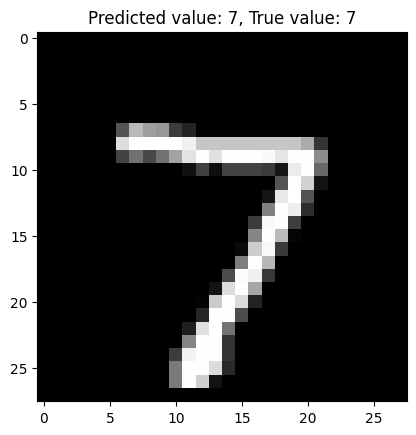

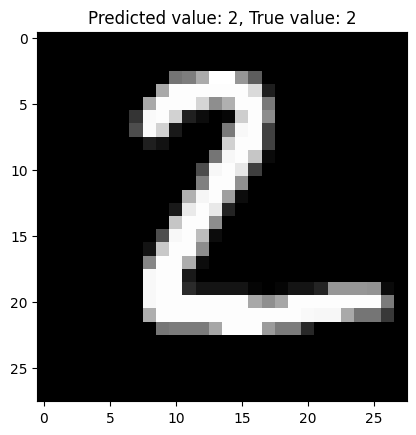

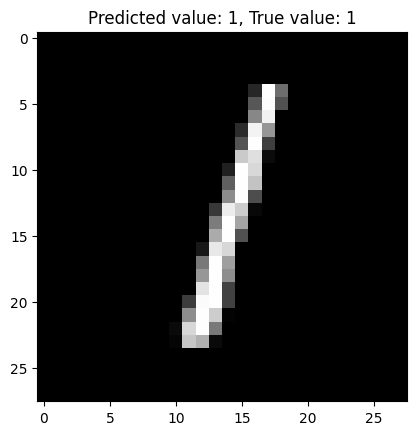

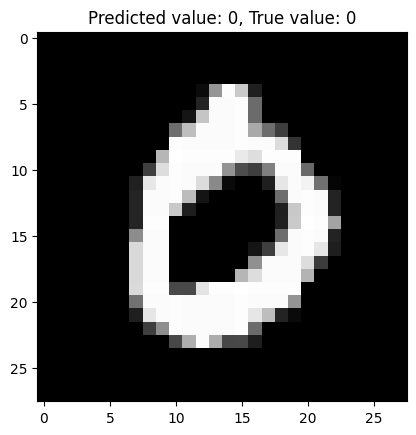

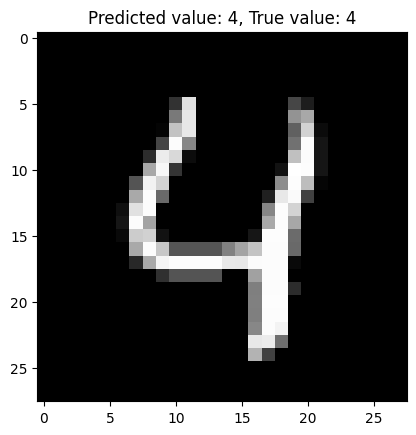

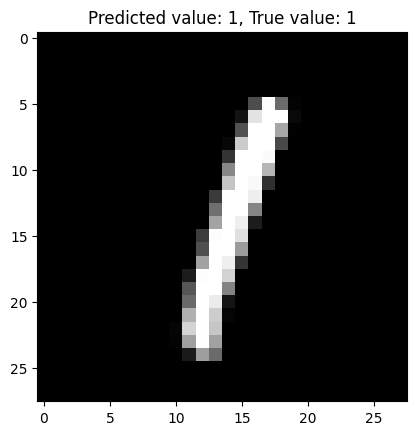

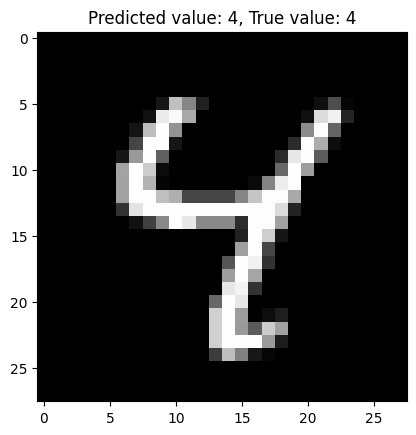

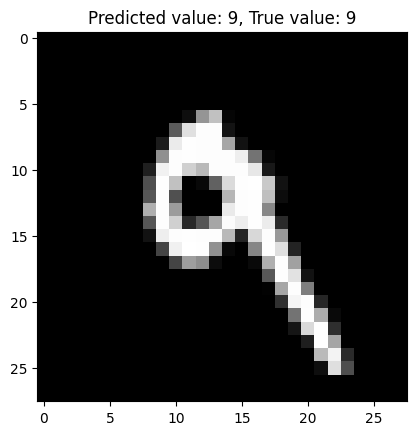

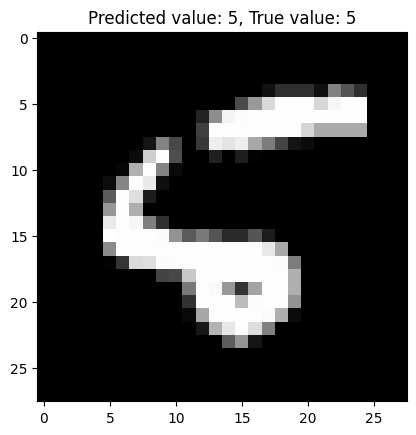

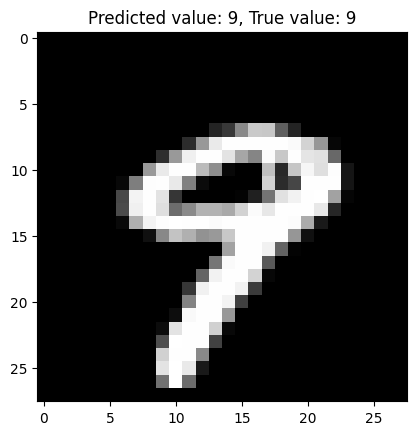

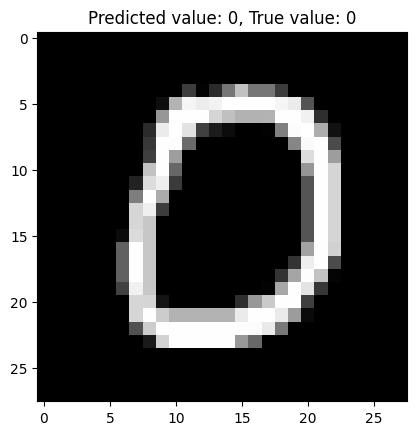

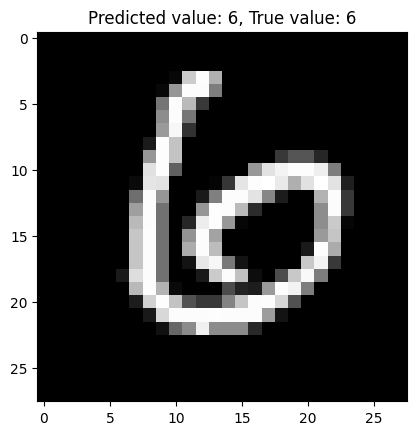

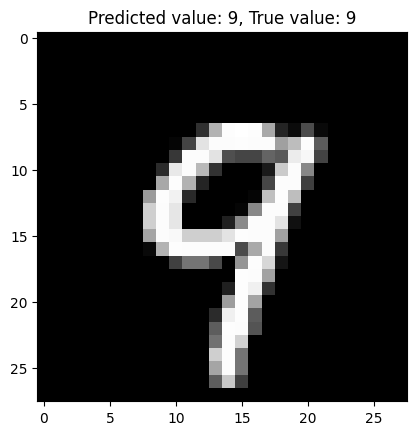

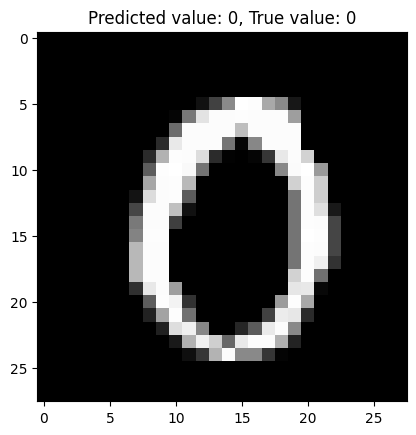

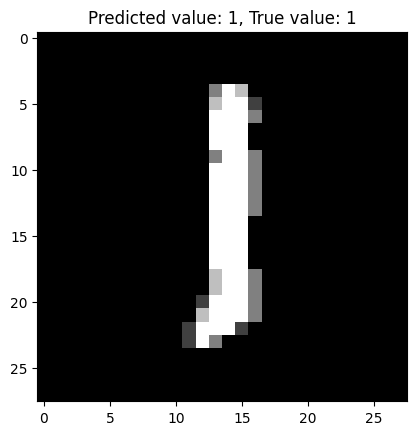

In [12]:
import matplotlib.pyplot as plt
from torch.utils.data import Subset

subset_test = Subset(data_test, range(15))

for image, label in subset_test:
  outputs = model(image.unsqueeze(0))  # Добавляем размерность батча
  _, predicted = torch.max(outputs, 1)

  # Отображение изображения и метки
  image = image.squeeze()
  plt.imshow(image, cmap='gray')
  plt.title('Predicted value: %d, True value: %d' % (predicted.item(), label))

  plt.show()